<a href="https://colab.research.google.com/github/khalilullahalfaath/AI_Tubes-03-Learning/blob/main/AI_Kelompok_15_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 15
--------------------


1.   Mirai Tsuchiya
2.   M. Ivan
3.   Khalilullah Al Faath



# Mengimport library yang dibutuhkan

In [1541]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Membaca dataset

In [1607]:
df = pd.read_excel("https://github.com/khalilullahalfaath/AI_Tubes-03-Learning/blob/19d11d6e2fa2d540afdc0cec3308b82c664d29f7/traintest.xlsx?raw=true")

In [1543]:
df

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0
...,...,...,...,...,...
291,292,59,64,1,1
292,293,65,67,0,1
293,294,53,65,12,0
294,295,57,64,1,0


# EDA (Exploratory Data Analysist)


## Info terkait dataset

In [1544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      296 non-null    int64
 1   x1      296 non-null    int64
 2   x2      296 non-null    int64
 3   x3      296 non-null    int64
 4   y       296 non-null    int64
dtypes: int64(5)
memory usage: 11.7 KB


Dapat dilihat bahwa seluruh data merupakan integers sehingga tidak perlu dilakukan perubahan untuk mendapatkan tipe data yang sama. Diketahui pula bahwa tidak ada data NULL sehingga tidak ada data yang perlu diisi

## Deskripsi terkait dataset

In [1545]:
df.describe()

,id,x1,x2,x3,y
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,148.500000,52.462838,62.881757,4.111486,0.736486
std,85.592056,10.896367,3.233753,7.291816,0.441285
min,1.000000,30.000000,58.000000,0.000000,0.000000
25%,74.750000,44.000000,60.000000,0.000000,0.000000
50%,148.500000,52.000000,63.000000,1.000000,1.000000
75%,222.250000,61.000000,65.250000,5.000000,1.000000
max,296.000000,83.000000,69.000000,52.000000,1.000000


## Menampilkan 3 data teratas

In [1546]:
df.head(3)

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0


## Menampilkan 3 data terbawah

In [1547]:
df.tail(3)

,id,x1,x2,x3,y
293,294,53,65,12,0
294,295,57,64,1,0
295,296,54,59,7,1


## Menampilkan 3 data sample

In [1548]:
df.sample(3)

,id,x1,x2,x3,y
227,228,56,65,9,0
1,2,54,60,11,0
109,110,41,65,0,1


## Drop kolom yang tidak dibutuhkan

In [1549]:
df.shape

(296, 5)

In [1550]:
df.drop(columns = ['id'], axis = 1, inplace = True)
df

,x1,x2,x3,y
0,60,64,0,1
1,54,60,11,0
2,65,62,22,0
3,34,60,0,1
4,38,69,21,0
...,...,...,...,...
291,59,64,1,1
292,65,67,0,1
293,53,65,12,0
294,57,64,1,0


In [1551]:
df.shape

(296, 4)

## Korelasi antar variabel

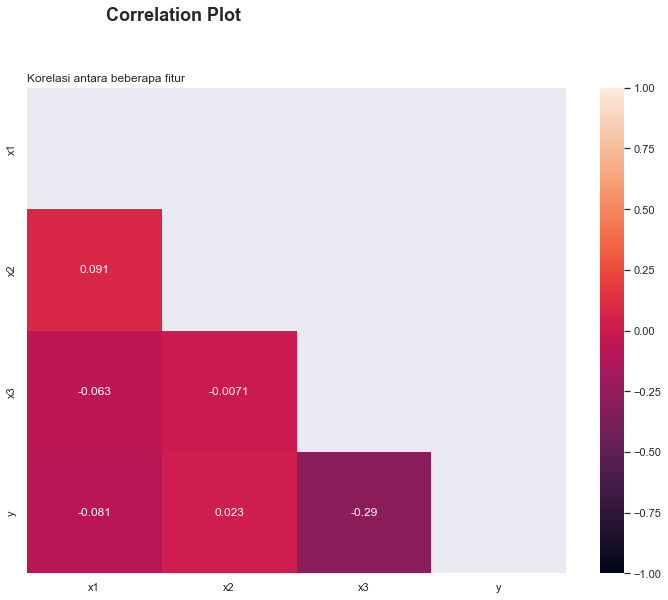

In [1552]:
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.suptitle("Correlation Plot", ha='left', x=0.155, y=1.04, fontsize=18, fontweight='bold')
plt.title("Korelasi antara beberapa fitur", loc='left', fontsize=12) 
plt.tight_layout()
plt.show()

dapat dilihat bahwa dataset di atas memiliki variabel yang tidak berkorelasi satu sama lain

## Histogram banyak nilai untuk tiap variabel

<AxesSubplot:xlabel='x3', ylabel='Count'>

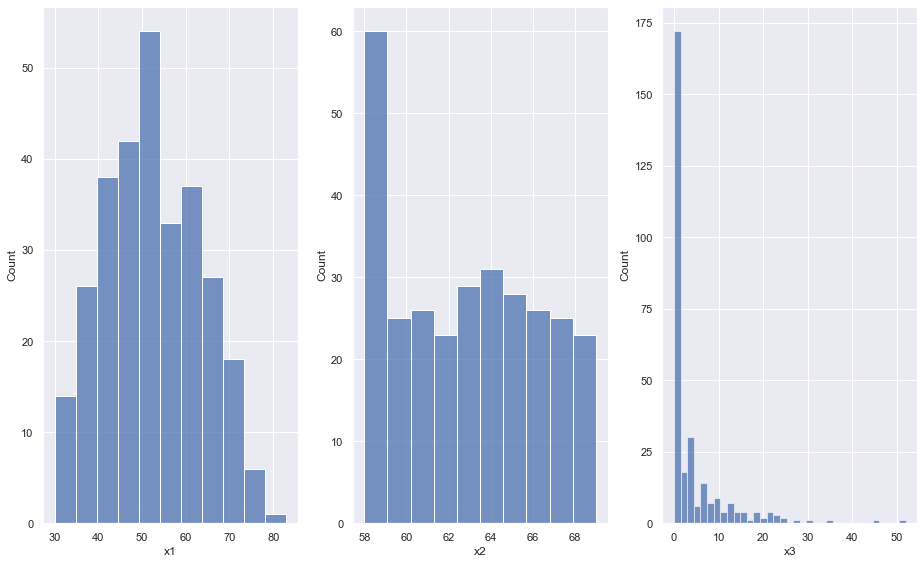

In [1553]:
fig, axs = plt.subplots(ncols=3)
sns.set(rc={'figure.figsize':(50,10)})
sns.histplot(df['x1'], ax=axs[0])
sns.histplot(df['x2'], ax=axs[1])
sns.histplot(df['x3'], ax=axs[2])

## Count plot untuk nilai y

1    218
0     78
Name: y, dtype: int64


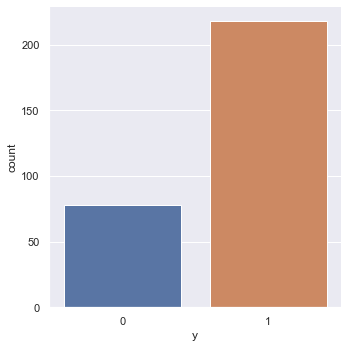

In [1554]:
print(df['y'].value_counts())
sns.catplot(x='y', data=df, kind='count')
plt.show()

## Box plot dataset

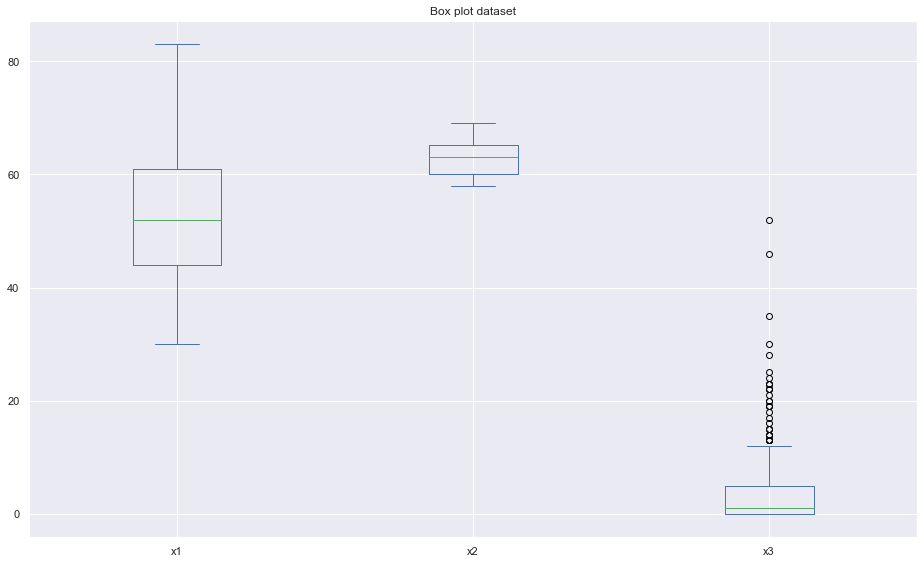

In [1555]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = df[['x1', 'x2', 'x3']].plot(kind='box', title='Box plot dataset')

dapat dilihat kalau outliers terlalu banyak di data x3 sehingga tidak memungkinkan untuk didrop.

# Pre-processing

## Mengubah nilai outliers

In [1608]:
def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = hitungOutliers(df["x3"])
percentage = len(outliers)/len(df["x3"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 34
max outlier value: 52
min outlier value: 13
Outliers percentage: 11.49%


In [1609]:
#comment code di bawah ketika tidak ingin memepetkan nilai outliers

Q1 = df["x3"].quantile(0.25)
Q3 = df["x3"].quantile(0.75)

IQR = Q3 - Q1

LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

df.loc[df['x3'] > UB, "x3"] = UB
df.loc[df['x3'] < LB, "x3"] = LB

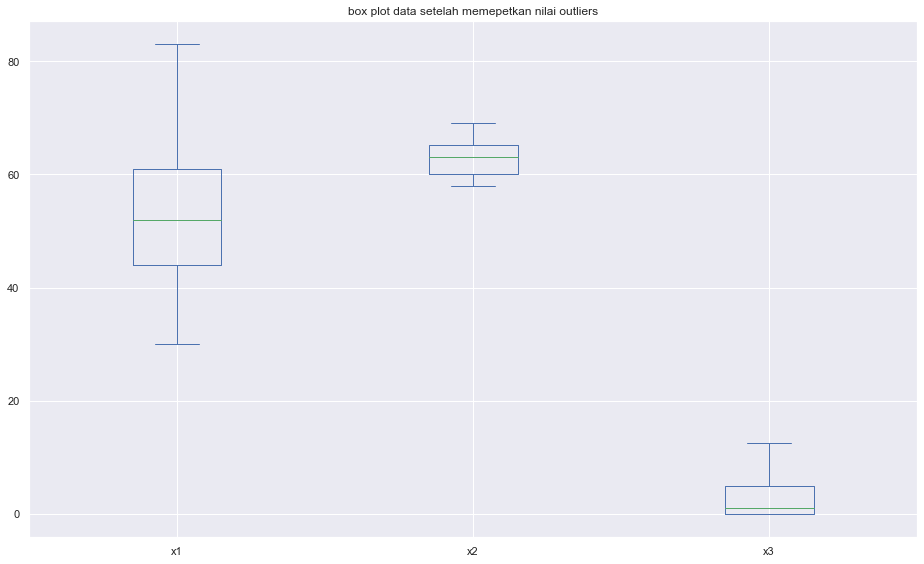

In [1610]:

plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = df[['x1', 'x2', 'x3']].plot(kind='box', title='box plot data setelah memepetkan nilai outliers')

## Normalisasi data

In [1559]:
#normalisasi
def minMaxScaling(df) :
    return (df.iloc[:,:4] - df.iloc[:,:4].min()) / (df.iloc[:,:4].max() - df.iloc[:,:4].min())

def standardScaling(df) : 
    return ((df.iloc[:,:4] - df.iloc[:,:4].mean()) / df.iloc[:,:4].std())

def robustScaling(df):
    return ((df.iloc[:,:4] - df.iloc[:,:4].median()) / (df.iloc[:,:4].quantile(0.75) - df.iloc[:,:4].quantile(0.25)))

dataNormalized = minMaxScaling(df)
dataRobusted = robustScaling(df)
dataStandarized = standardScaling(df)

In [1560]:
dataNormalized

,x1,x2,x3,y
0,0.566038,0.545455,0.00,1.0
1,0.452830,0.181818,0.88,0.0
2,0.660377,0.363636,1.00,0.0
3,0.075472,0.181818,0.00,1.0
4,0.150943,1.000000,1.00,0.0
...,...,...,...,...
291,0.547170,0.545455,0.08,1.0
292,0.660377,0.818182,0.00,1.0
293,0.433962,0.636364,0.96,0.0
294,0.509434,0.545455,0.08,0.0


In [1561]:
dataRobusted

,x1,x2,x3,y
0,0.470588,0.190476,-0.2,0.0
1,0.117647,-0.571429,2.0,-1.0
2,0.764706,-0.190476,2.3,-1.0
3,-1.058824,-0.571429,-0.2,0.0
4,-0.823529,1.142857,2.3,-1.0
...,...,...,...,...
291,0.411765,0.190476,0.0,0.0
292,0.764706,0.761905,-0.2,0.0
293,0.058824,0.380952,2.2,-1.0
294,0.294118,0.190476,0.0,-1.0


In [1562]:
dataStandarized

,x1,x2,x3,y
0,0.691713,0.345804,-0.722610,0.597151
1,0.141071,-0.891149,1.801873,-1.668961
2,1.150582,-0.272673,2.146121,-1.668961
3,-1.694403,-0.891149,-0.722610,0.597151
4,-1.327308,1.891995,2.146121,-1.668961
...,...,...,...,...
291,0.599940,0.345804,-0.493112,0.597151
292,1.150582,1.273518,-0.722610,0.597151
293,0.049297,0.655042,2.031372,-1.668961
294,0.416392,0.345804,-0.493112,-1.668961


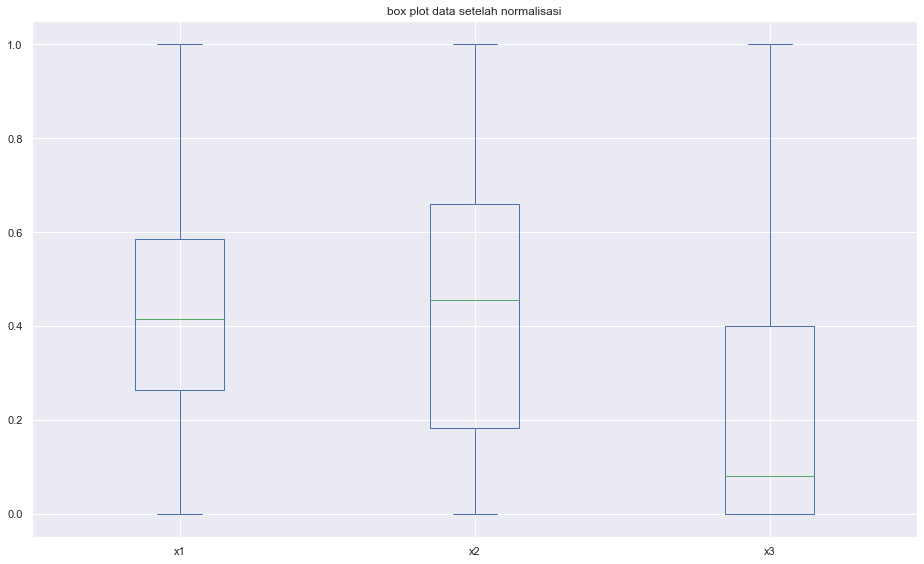

In [1563]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataNormalized[['x1', 'x2', 'x3']].plot(kind='box', title='box plot data setelah normalisasi')

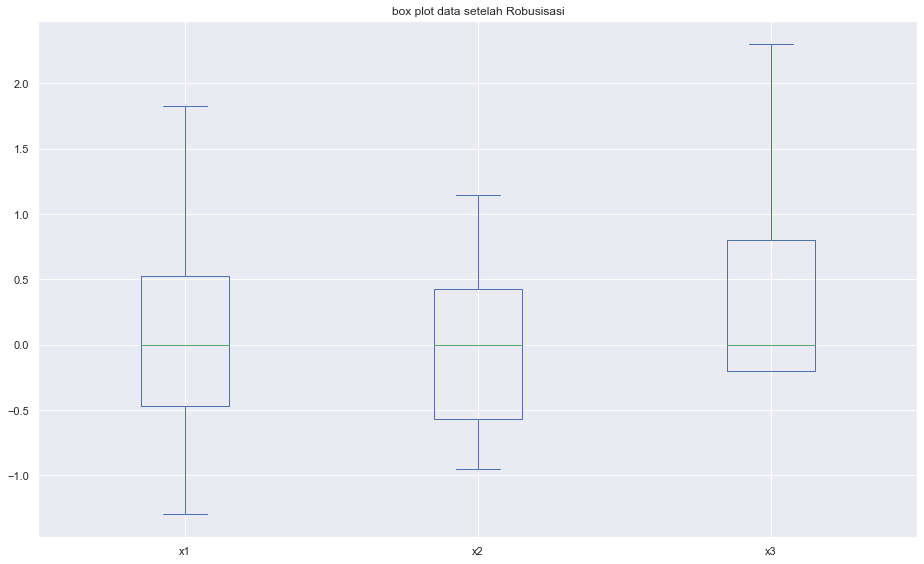

In [1564]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataRobusted[['x1', 'x2', 'x3']].plot(kind='box', title='box plot data setelah Robusisasi')

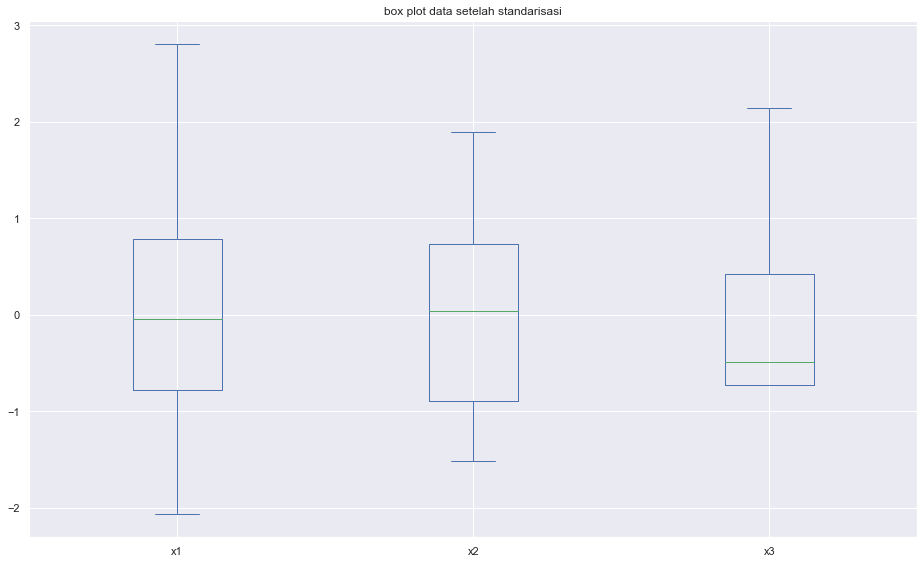

In [1565]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataStandarized[['x1', 'x2', 'x3']].plot(kind='box', title='box plot data setelah standarisasi')

# Split dataset

dataset akan dipisah menjadi training set dan validation set untuk menghitung akurasi tiap nilai k

In [1611]:
# Mengubah dataset menjadi array
arrayDf = dataNormalized
arrayDf.to_numpy()
print(arrayDf)

           x1        x2    x3    y
0    0.566038  0.545455  0.00  1.0
1    0.452830  0.181818  0.88  0.0
2    0.660377  0.363636  1.00  0.0
3    0.075472  0.181818  0.00  1.0
4    0.150943  1.000000  1.00  0.0
..        ...       ...   ...  ...
291  0.547170  0.545455  0.08  1.0
292  0.660377  0.818182  0.00  1.0
293  0.433962  0.636364  0.96  0.0
294  0.509434  0.545455  0.08  0.0
295  0.452830  0.090909  0.56  1.0

[296 rows x 4 columns]


In [1567]:
def splitDependent(df):
    x = df.iloc[:,[0,1,2]].values
    y = df.iloc[:,[3]].values
    return x,y

## Contoh penerapan split dataset

In [1568]:
x,y = splitDependent(dataNormalized.head(10))
print(x)
print()
print(y)

[[0.56603774 0.54545455 0.        ]
 [0.45283019 0.18181818 0.88      ]
 [0.66037736 0.36363636 1.        ]
 [0.0754717  0.18181818 0.        ]
 [0.1509434  1.         1.        ]
 [0.05660377 0.         0.8       ]
 [0.62264151 0.27272727 0.        ]
 [0.50943396 0.54545455 0.        ]
 [0.30188679 0.         0.24      ]
 [0.24528302 0.63636364 0.        ]]

[[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [1569]:
#arrayDf = arrayDf.head(20)

# KNN

## Perhitungan jarak

In [1570]:
def sortNilaiTraining(d):
    return d[0]

In [1571]:
def euclidean(xTrain,yTrain,xVal):
    result = []
    for x in xVal:
        resultPerTraining = []; indexTraining = 0
        for j in xTrain:
            d = (x[0]-j[0])**2 + (x[1]-j[1])**2 + (x[2]-j[2])**2
            #print(x)
            #print(yTrain)
            hasilPerTrainingData = [math.sqrt(d),yTrain[indexTraining]]
            #print(resultPerTraining)
            resultPerTraining.append(hasilPerTrainingData)
            indexTraining = indexTraining + 1
        resultPerTraining.sort(key=sortNilaiTraining)
        result.append(resultPerTraining)
    return(result)

def manhattan(xTrain,yTrain,xVal):
    result = []
    for x in xVal:
        resultPerTraining = []; indexTraining = 0
        for j in xTrain:
            d = abs(x[0]-j[0]) + abs(x[1]-j[1]) + abs(x[2]-j[2])
            #print(x)
            hasilPerTrainingData = [d,yTrain[indexTraining]]
            resultPerTraining.append(hasilPerTrainingData)
            indexTraining = indexTraining + 1
        resultPerTraining.sort(key=sortNilaiTraining)
        result.append(resultPerTraining)
        #print(result)
    return(result)

def minkowski(xTrain,yTrain,xVal,h=9):
    result = []
    for x in xVal:
        resultPerTraining = []; indexTraining = 0
        for j in xTrain:
            d = (abs(x[0]-j[0]))**h + (abs(x[1]-j[1]))**h + (abs(x[2]-j[2]))**h
            #print(x)
            hasilPerTrainingData = [d**(1/h),yTrain[indexTraining]]
            resultPerTraining.append(hasilPerTrainingData)
            indexTraining = indexTraining + 1
        resultPerTraining.sort(key=sortNilaiTraining)
        result.append(resultPerTraining)
        #print(result)
    return(result) 

#def minkowski(xTrain,yTrain,xVal):

## Pemilihan k tetangga terdekat

In [1572]:
def pilihTetangga(result,k):
    tetangga = []
    #print(result)
    for data in result:
        selected = data[:k]
        tetangga.append(selected)
    #print(tetangga)
    return tetangga


## Memilih data prediksi pada tetangga sebanyak k

In [1573]:
np.unique(dataRobusted["y"])

array([-1.,  0.])

In [1574]:
np.unique(dataNormalized["y"])

array([0., 1.])

In [1575]:
np.unique(dataStandarized["y"])

array([-1.66896065,  0.59715106])

Ubah kondisi sesuai data unique pada metode skaling
if dataVal[1] == <"ubah di sini">:

In [1576]:
def vote(result):
    hasil = []
    #print(result)
    for data in result:
        count0 = 0; count1 = 0; 
        for dataVal in data:
            if dataVal[1] == 0:
                count0 = count0 + 1
            elif dataVal[1] == 1:
                count1 = count1 + 1
        if count0 > count1:
            hasil.append(0)
        else:
            hasil.append(1)
    #print(hasil)
    return hasil

    

## Menghitung nilai akurasi

In [1577]:
def akurasi(hasil,yVal):
    akurasi = 0
    for i in range(len(hasil)):
        if hasil[i] == yVal[i]:
                akurasi = akurasi + 1
    return akurasi

## Membuat plot nilai akurasi untuk memilih k terbaik

In [1578]:
def makePlot(akurasiList,k):
    listAngka = []
    for i in range(1,k,2):
        listAngka.append(i)
    plt.plot(listAngka,akurasiList)
    plt.title("Hasil Akurasi")
    plt.xlabel("Nilai k")
    plt.ylabel("Akurasi")
    plt.show()

## Main program KNN untuk training data dengan menggunakan validasi data dengan cara cross kfold 

In [1579]:
def knn(xTrain,yTrain,xVal,yVal,k):
    resultEuclidean = euclidean(xTrain,yTrain,xVal)
    resultManhattan = manhattan(xTrain,yTrain,xVal)
    resultMinkowski = minkowski(xTrain,yTrain,xVal)
    
    resultEuclidean = pilihTetangga(resultEuclidean,k)
    resultManhattan = pilihTetangga(resultManhattan,k)
    resultMinkowski = pilihTetangga(resultMinkowski,k)
    
    finalEuclidean  = vote(resultEuclidean)
    finalManhattan  = vote(resultManhattan) 
    finalMinkowski  = vote(resultMinkowski)
    
    hasilAkurasiEuclidean = (akurasi(finalEuclidean,yVal)/len(yVal))*100
    hasilAkurasiManhattan = (akurasi(finalManhattan,yVal)/len(yVal))*100
    hasilAkurasiMinkowski = (akurasi(finalMinkowski,yVal)/len(yVal))*100
    #print(hasilAkurasiEuclidean,hasilAkurasiManhattan,hasilAkurasiMinkowski)
    #print(str(hasilAkurasiEuclidean)+"%")
    return hasilAkurasiEuclidean,hasilAkurasiManhattan,hasilAkurasiMinkowski

## Training data dengan pemilihan data kfolds

In [1580]:
def kFolds(arrayDf,k):
    # membagi data menjadi k folds
    folds = np.array_split(arrayDf,k)
    listEuclidean, listManhattan,listMinkowski = [],[],[]
    
    for i in range(1,k,2):
        #print("Folds: ",i)
        trainingSet = folds.copy()
        validationSet = folds[i]
        del trainingSet[i]
        trainingSet = pd.concat(trainingSet, sort=False)

        xTrain,yTrain = splitDependent(trainingSet)
        xVal,yVal = splitDependent(validationSet)
        #print("training set: \n",trainingSet)
        #print("validation set: \n", validationSet)
        hEuclidean, hManhattan, hMinkowski = knn(xTrain,yTrain,xVal,yVal,k)
        listEuclidean.append(hEuclidean)
        listManhattan.append(hManhattan)
        listMinkowski.append(hMinkowski)

    print("Hasil Akurasi Euclidean")
    makePlot(listEuclidean,k)
    print("Hasil Akurasi Manhattan")
    makePlot(listManhattan,k)
    print("Hasil Akurasi Minkowski")
    makePlot(listMinkowski,k)
        
    return 0

## Akurasi data dengan pemilihan data kfolds

Hasil Akurasi Euclidean


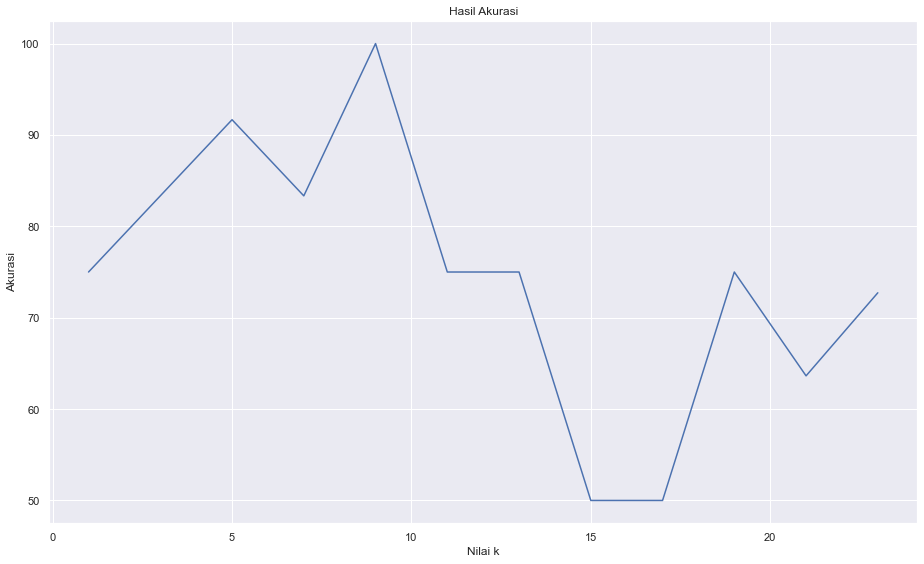

Hasil Akurasi Manhattan


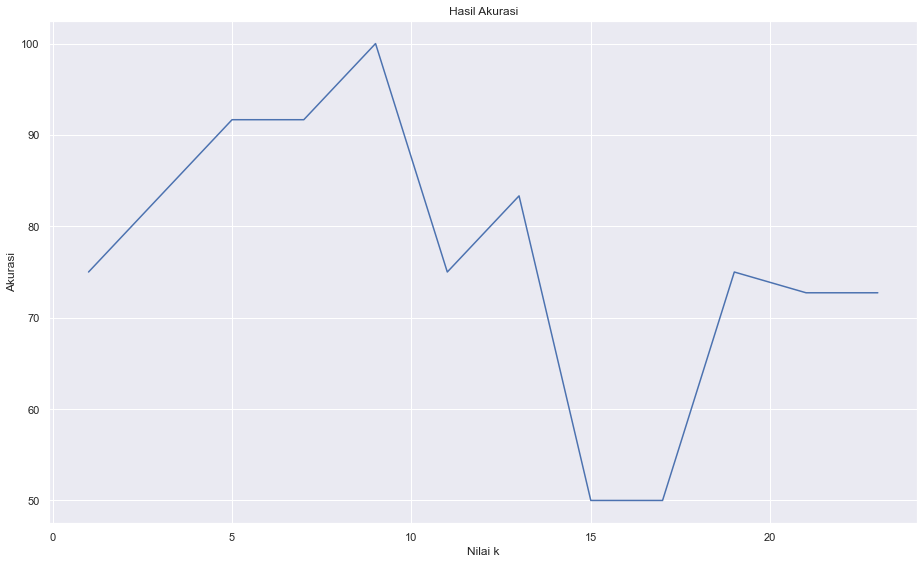

Hasil Akurasi Minkowski


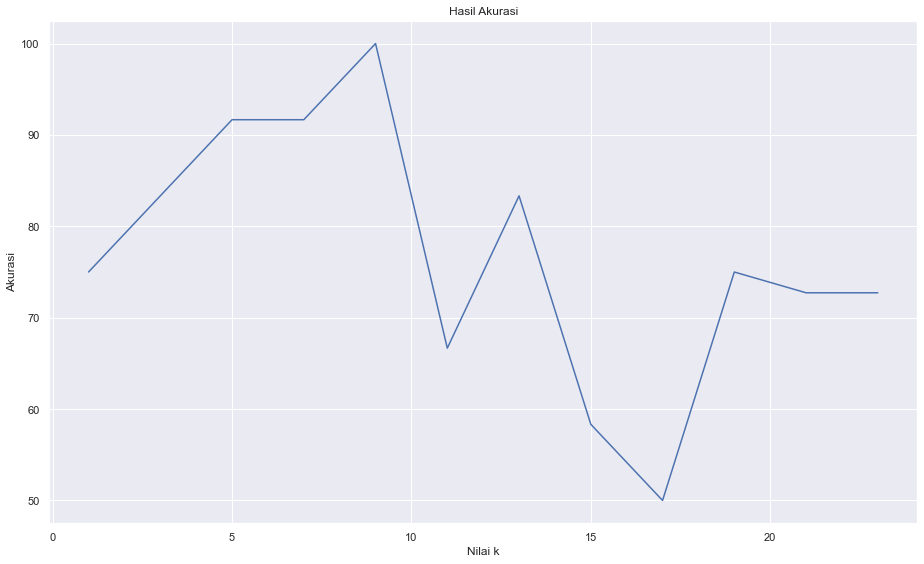

0

In [1581]:
kFolds(dataNormalized,25)

dapat dilihat bahwa nilai k terbaik adalah k = 9 dan berlaku untuk semua metode pencarian distance

# Testing data

## Import dataset test

In [1582]:
dfTest = pd.read_excel("https://github.com/khalilullahalfaath/AI_Tubes-03-Learning/blob/19d11d6e2fa2d540afdc0cec3308b82c664d29f7/traintest.xlsx?raw=true","test")

In [1583]:
dfTest

,id,x1,x2,x3,y
0,297,43,59,2,?
1,298,67,66,0,?
2,299,58,60,3,?
3,300,49,63,3,?
4,301,45,60,0,?
5,302,54,58,1,?
6,303,56,66,3,?
7,304,42,69,1,?
8,305,50,59,2,?
9,306,59,60,0,?


## drop kolom ID

In [1584]:
dfTest.shape

(10, 5)

In [1585]:
dfTest.drop(columns = ['id'], axis = 1, inplace = True)
dfTest

,x1,x2,x3,y
0,43,59,2,?
1,67,66,0,?
2,58,60,3,?
3,49,63,3,?
4,45,60,0,?
5,54,58,1,?
6,56,66,3,?
7,42,69,1,?
8,50,59,2,?
9,59,60,0,?


In [1586]:
dfTest.shape

(10, 4)

## Skaling dataset test

In [1587]:
#normalisasi
def minMaxScalingTest(df) :
    return (df.iloc[:,:3] - df.iloc[:,:3].min()) / (df.iloc[:,:3].max() - df.iloc[:,:3].min())

def standardScalingTest(df) : 
    return (df.iloc[:,:3] - df.iloc[:,:3].mean() / df.iloc[:,:3].std())

def robustScalingTest(df):
    return ((df.iloc[:,:3] - df.iloc[:,:3].median()) / (df.iloc[:,:3].quantile(0.75) - df.iloc[:,:3].quantile(0.25)))

dataTestNormalized = minMaxScalingTest(dfTest)
dataTestRobusted = robustScalingTest(dfTest)
dataTestStandarized = standardScalingTest(dfTest)

dataTestNormalized

,x1,x2,x3
0,0.04,0.090909,0.666667
1,1.00,0.727273,0.000000
2,0.64,0.181818,1.000000
3,0.28,0.454545,1.000000
4,0.12,0.181818,0.000000
5,0.48,0.000000,0.333333
6,0.56,0.727273,1.000000
7,0.00,1.000000,0.333333
8,0.32,0.090909,0.666667
9,0.68,0.181818,0.000000


In [1588]:
dataTestRobusted

,x1,x2,x3
0,-0.782609,-0.166667,0.2
1,1.304348,1.000000,-0.6
2,0.521739,0.000000,0.6
3,-0.260870,0.500000,0.6
4,-0.608696,0.000000,-0.6
5,0.173913,-0.333333,-0.2
6,0.347826,1.000000,0.6
7,-0.869565,1.500000,-0.2
8,-0.173913,-0.166667,0.2
9,0.608696,0.000000,-0.6


In [1589]:
dataTestStandarized

,x1,x2,x3
0,36.440255,42.559767,0.818242
1,60.440255,49.559767,-1.181758
2,51.440255,43.559767,1.818242
3,42.440255,46.559767,1.818242
4,38.440255,43.559767,-1.181758
5,47.440255,41.559767,-0.181758
6,49.440255,49.559767,1.818242
7,35.440255,52.559767,-0.181758
8,43.440255,42.559767,0.818242
9,52.440255,43.559767,-1.181758


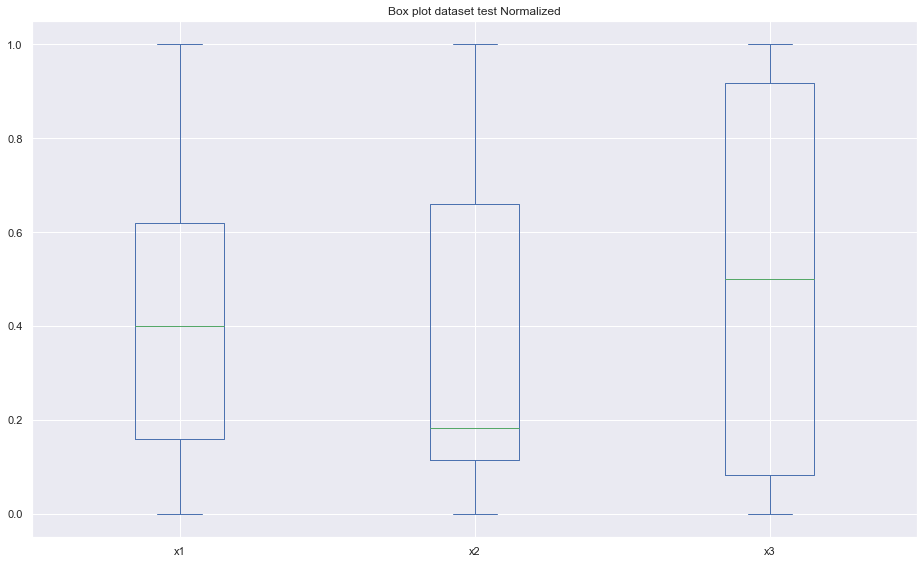

In [1590]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataTestNormalized[['x1', 'x2', 'x3']].plot(kind='box', title='Box plot dataset test Normalized')

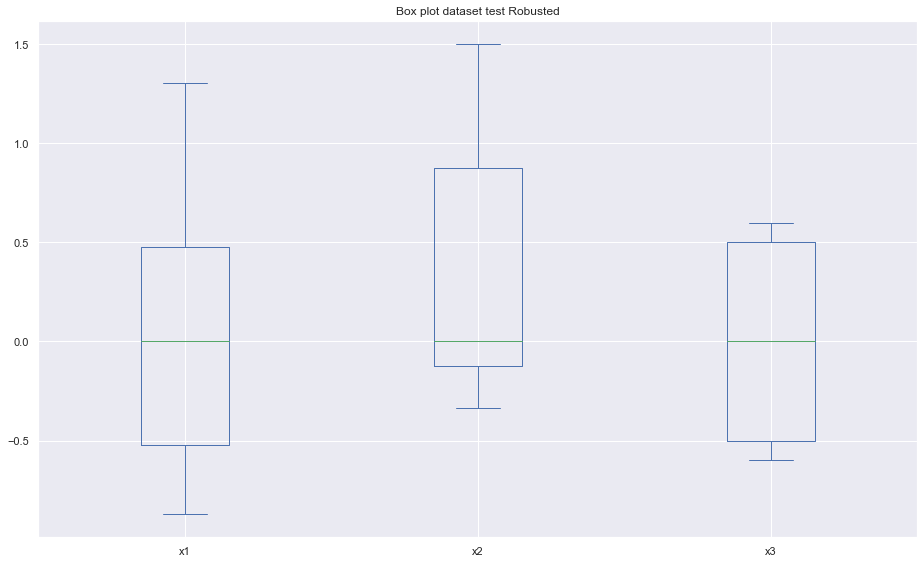

In [1612]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataTestRobusted[['x1', 'x2', 'x3']].plot(kind='box', title='Box plot dataset test Robusted')

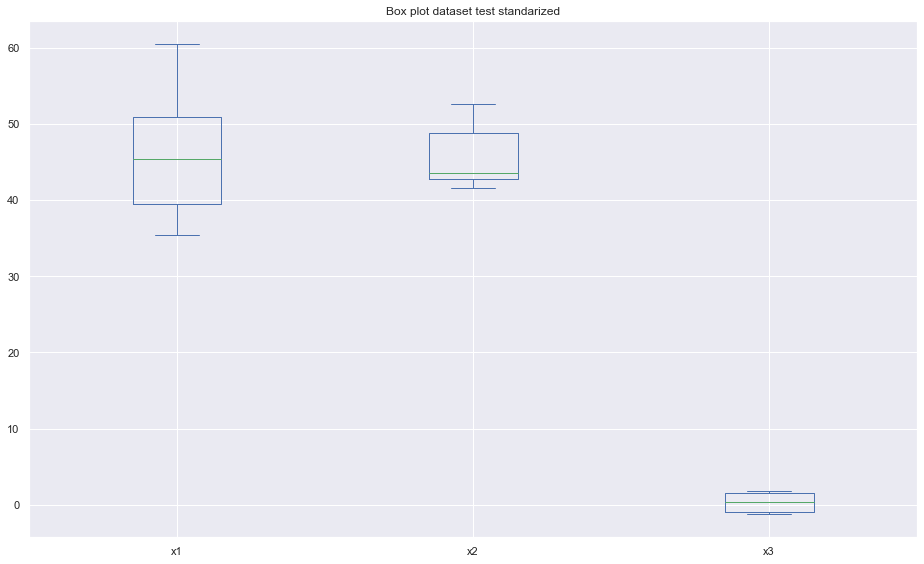

In [1613]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataTestStandarized[['x1', 'x2', 'x3']].plot(kind='box', title='Box plot dataset test standarized')

## Mencari nilai prediksi pada kolom target dataset dengan data training sebelumnya. dengan k terbaik adalah 9 untuk semua pencarian distance

In [1593]:
df.head(5)

,x1,x2,x3,y
0,60,64,0.0,1
1,54,60,11.0,0
2,65,62,12.5,0
3,34,60,0.0,1
4,38,69,12.5,0


In [1594]:
# ubah metode scaling di sini dengan memanggil nama df yang diinginkan
arrayDf = dataNormalized

In [1595]:
xTrain,yTrain = splitDependent(arrayDf)

In [1596]:
print(xTrain[:5])
print(yTrain[:5])

[[0.56603774 0.54545455 0.        ]
 [0.45283019 0.18181818 0.88      ]
 [0.66037736 0.36363636 1.        ]
 [0.0754717  0.18181818 0.        ]
 [0.1509434  1.         1.        ]]
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [1597]:
#panggil array sesuai scaling yang diinginkan
xTest = np.array(dataTestNormalized)

In [1598]:
print(xTest)

[[0.04       0.09090909 0.66666667]
 [1.         0.72727273 0.        ]
 [0.64       0.18181818 1.        ]
 [0.28       0.45454545 1.        ]
 [0.12       0.18181818 0.        ]
 [0.48       0.         0.33333333]
 [0.56       0.72727273 1.        ]
 [0.         1.         0.33333333]
 [0.32       0.09090909 0.66666667]
 [0.68       0.18181818 0.        ]]


In [1599]:
# resultEuclidean, resultManhattan, resultMinkowski = [],[],[]
# resultEuclideanFix, resultManhattanFix, resultMinkowskiFix = [],[],[]
# finalEuclidean, finalManhattan, finalMinkowski = [],[],[]

resultEuclidean = euclidean(xTrain,yTrain,xTest)
#print(resultPerTraining)
resultManhattan = manhattan(xTrain,yTrain,xTest)
resultMinkowski = minkowski(xTrain,yTrain,xTest)

resultEuclideanFix = pilihTetangga(resultEuclidean,9)
resultManhattanFix = pilihTetangga(resultManhattan,9)
resultMinkowskiFix = pilihTetangga(resultMinkowski,9)

finalEuclidean  = vote(resultEuclideanFix)
finalManhattan  = vote(resultManhattanFix) 
finalMinkowski  = vote(resultMinkowskiFix)

print(finalEuclidean)
print(finalManhattan)
print(finalMinkowski)

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 0, 1, 1, 1]


## Mengisi dataset test dengan kolom prediksi

In [1600]:
xResult = pd.DataFrame(dfTest, columns=['x1', 'x2', 'x3'])
yResult = pd.DataFrame(finalManhattan, columns=['y'])
result = pd.merge(xResult, yResult, left_index=True, right_index=True)
result

,x1,x2,x3,y
0,43,59,2,1
1,67,66,0,1
2,58,60,3,0
3,49,63,3,0
4,45,60,0,1
5,54,58,1,1
6,56,66,3,0
7,42,69,1,1
8,50,59,2,1
9,59,60,0,1


## ekspor dataset 

In [1601]:
dataResult = pd.ExcelWriter('dataResult.xlsx')
result.to_excel(dataResult)
dataResult.save()

# Just for fun

In [1602]:
# Split dataset to train and test data
test_size = 0.2
trainingSet = dataNormalized.sample(frac = 1-test_size, random_state = 74)
validationSet = dataNormalized.drop(trainingSet.index)

trainingSet.reset_index(drop=True, inplace=True)
validationSet.reset_index(drop=True, inplace=True)

print(f"No. of training examples: {trainingSet.shape[0]}")
print(f"No. of testing examples: {validationSet.shape[0]}")

No. of training examples: 237
No. of testing examples: 59


In [1603]:
trainingSet.head(3)

,x1,x2,x3,y
0,0.094340,0.454545,0.0,1.0
1,0.320755,0.363636,0.0,0.0
2,0.716981,0.909091,0.0,1.0


In [1604]:
validationSet.head(3)

,x1,x2,x3,y
0,0.566038,0.545455,0.00,1.0
1,0.075472,0.181818,0.00,1.0
2,0.754717,0.090909,0.64,1.0


Hasil Akurasi Euclidean


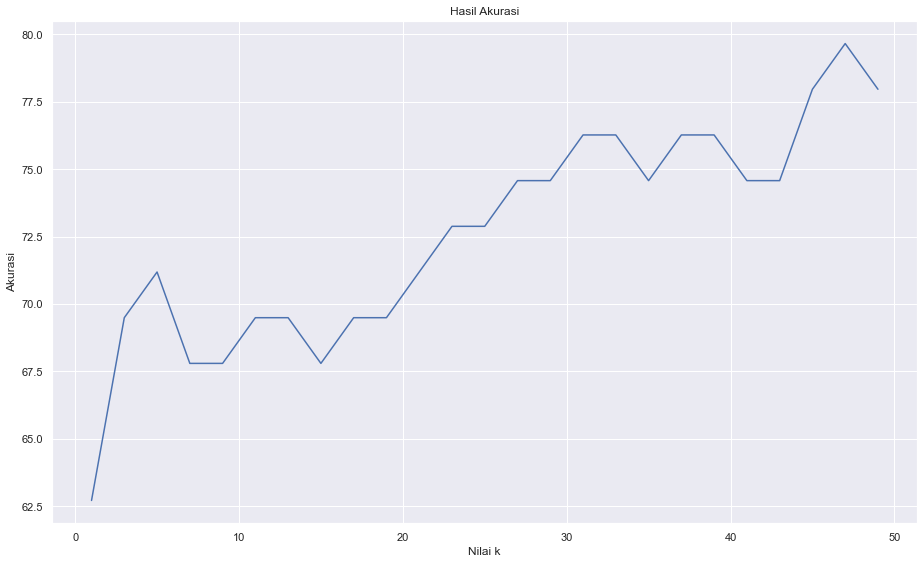

Hasil Akurasi Manhattan


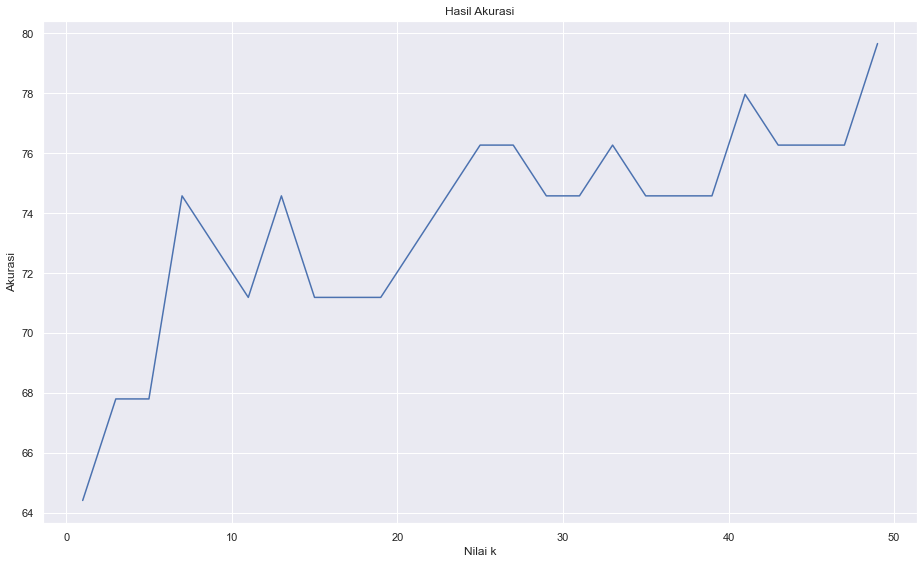

Hasil Akurasi Minkowski


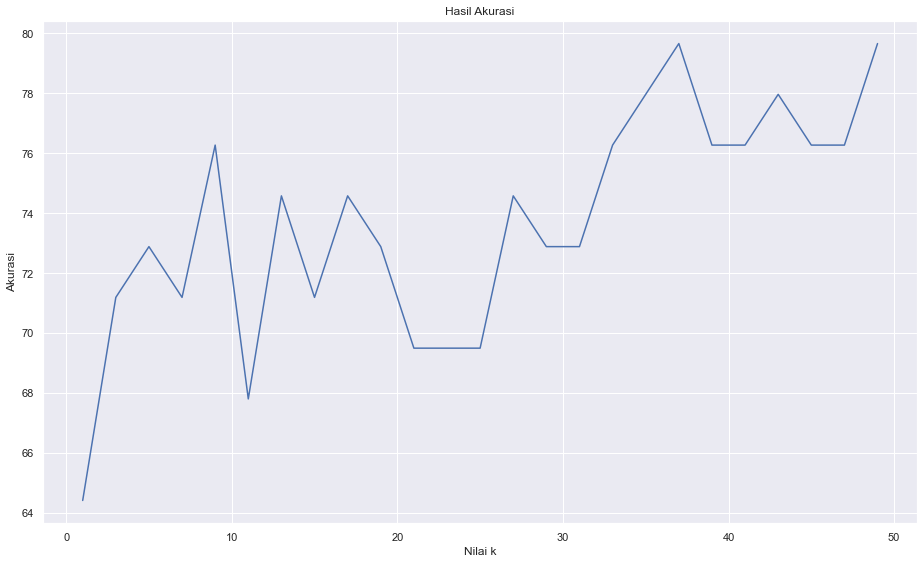

In [1605]:
xTrain,yTrain = splitDependent(trainingSet)
xVal,yVal = splitDependent(validationSet)

resultEuclidean, resultManhattan, resultMinkowski = [],[],[]
resultEuclideanFix, resultManhattanFix, resultMinkowskiFix = [],[],[]
finalEuclidean, finalManhattan, finalMinkowski = [],[],[]
listEuclidean, listManhattan,listMinkowski = [],[],[]

xTrain = np.array(xTrain)
#print(xTrain)
yTrain = np.array(yTrain)
xVal = np.array(xVal)
yVal = np.array(yVal)

for i in range(1,50,2):
  resultEuclidean = euclidean(xTrain,yTrain,xVal)
  resultManhattan = manhattan(xTrain,yTrain,xVal)
  resultMinkowski = minkowski(xTrain,yTrain,xVal)

  resultEuclideanFix = pilihTetangga(resultEuclidean,i)
  resultManhattanFix = pilihTetangga(resultManhattan,i)
  resultMinkowskiFix = pilihTetangga(resultMinkowski,i)

  finalEuclidean  = vote(resultEuclideanFix)
  finalManhattan  = vote(resultManhattanFix) 
  finalMinkowski  = vote(resultMinkowskiFix)

  hasilAkurasiEuclidean = (akurasi(finalEuclidean,yVal)/len(yVal))*100
  hasilAkurasiManhattan = (akurasi(finalManhattan,yVal)/len(yVal))*100
  hasilAkurasiMinkowski = (akurasi(finalMinkowski,yVal)/len(yVal))*100
  #print(hasilAkurasiEuclidean,hasilAkurasiManhattan,hasilAkurasiMinkowski)
  
  listEuclidean.append(hasilAkurasiEuclidean)
  listManhattan.append(hasilAkurasiManhattan)
  listMinkowski.append(hasilAkurasiMinkowski)

  #print(i)
  #print(str(hasilAkurasiEuclidean)+"%")
  #print(str(hasilAkurasiManhattan)+"%")
  #print(str(hasilAkurasiMinkowski)+"%")

print("Hasil Akurasi Euclidean")
makePlot(listEuclidean,50)
print("Hasil Akurasi Manhattan")
makePlot(listManhattan,50)
print("Hasil Akurasi Minkowski")
makePlot(listMinkowski,50)

